In [1]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Image
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(9.0,9.0)

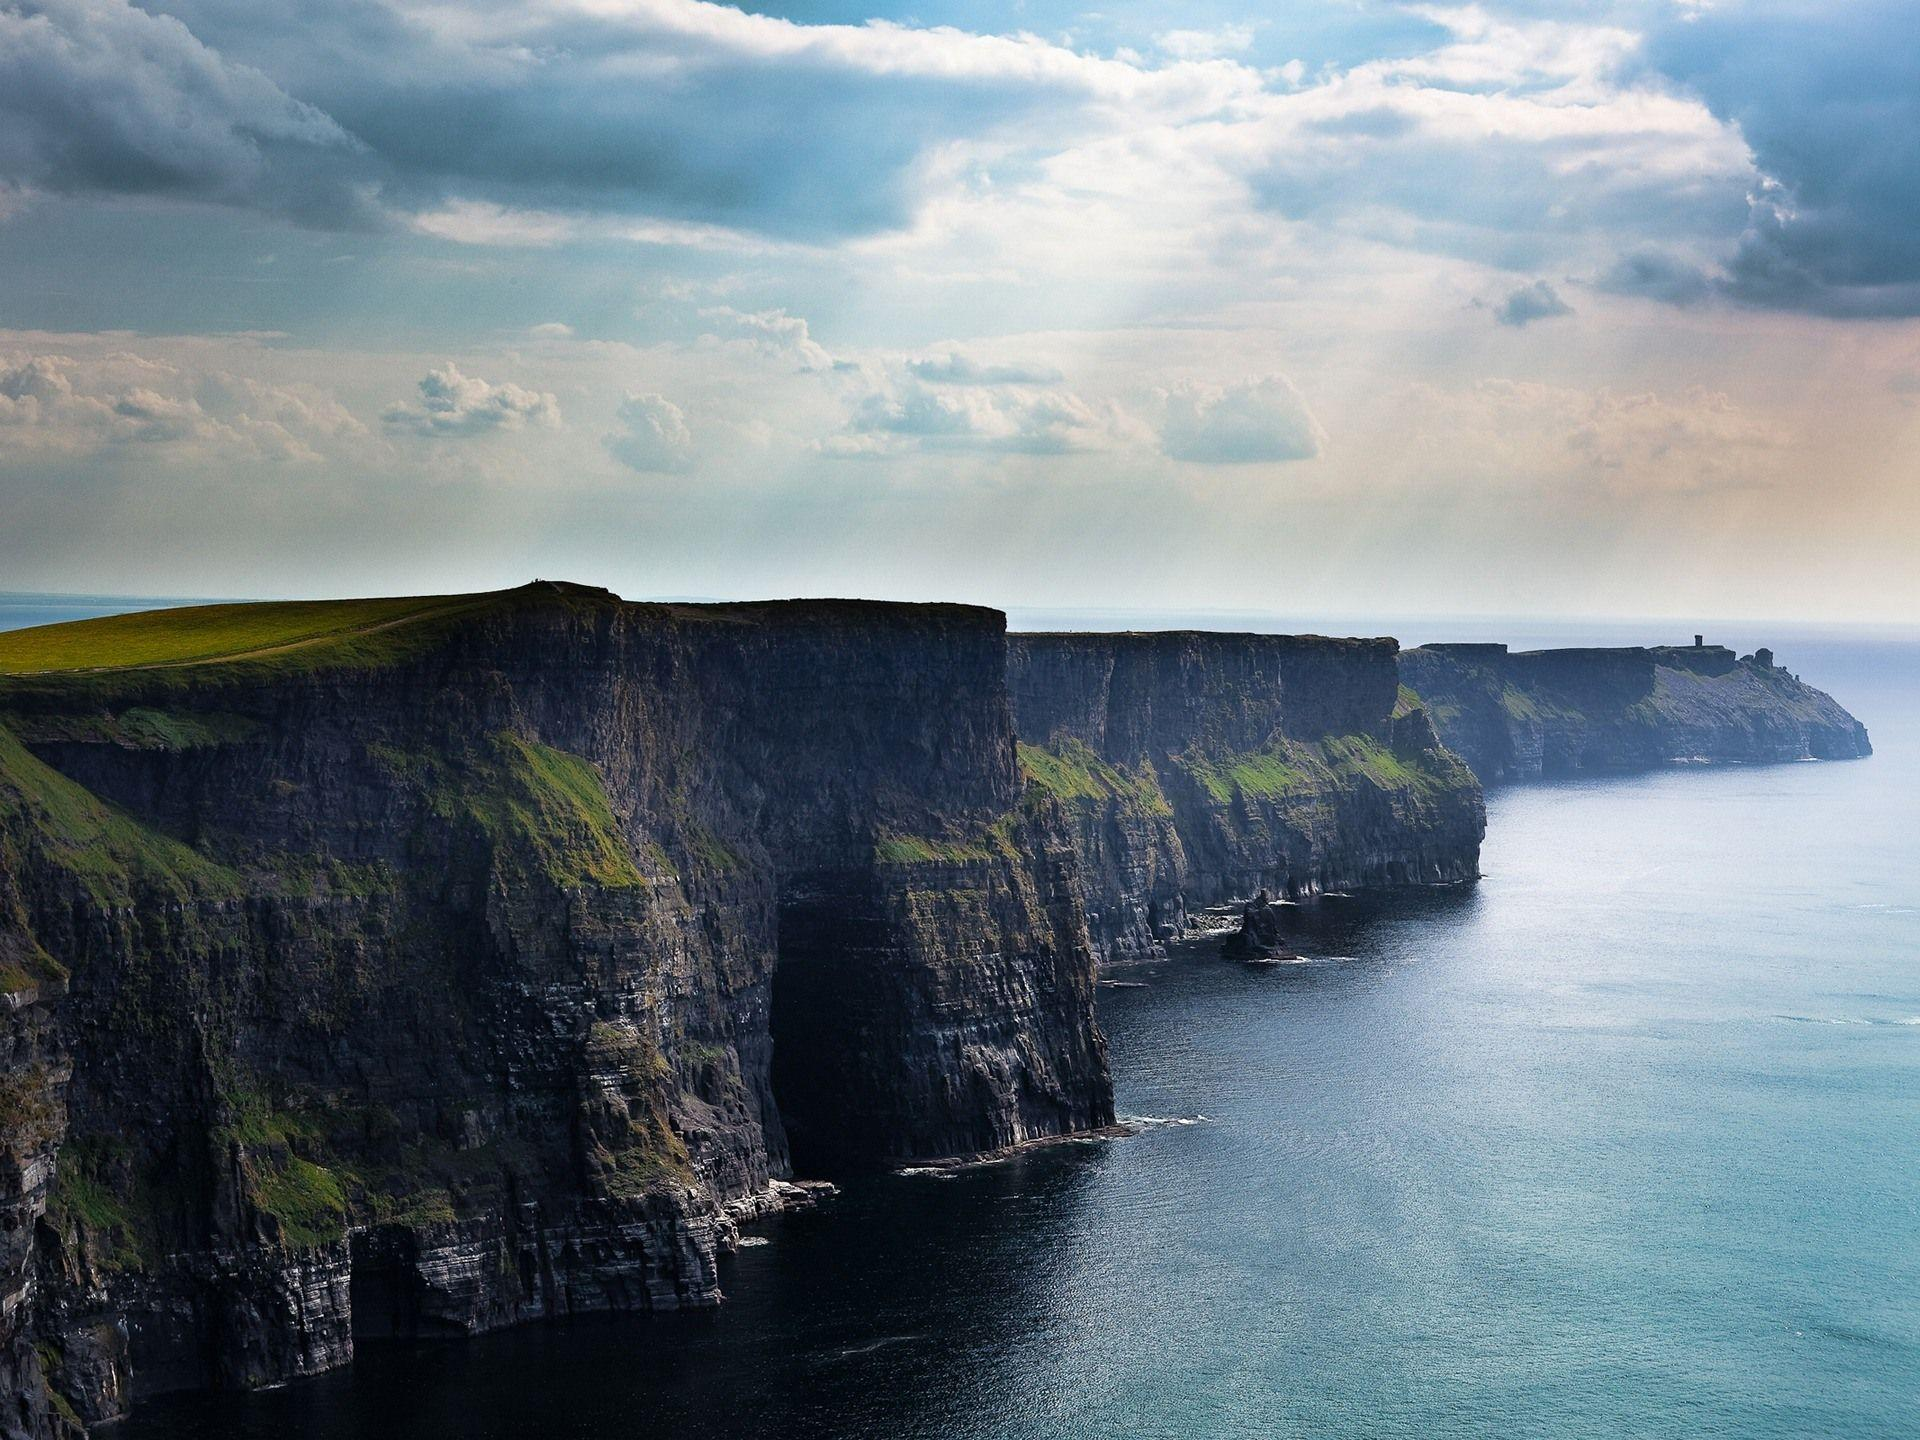

In [2]:
img_bgr = cv2.imread("Cliff.jpg",cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

Image(filename='Cliff.jpg')

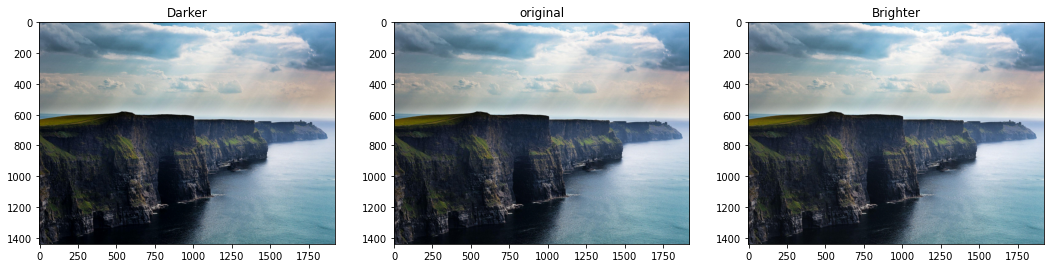

In [3]:
factor = int(input('Factor to Multipy = '))
matrix = np.ones(img_rgb.shape,dtype="uint8") * factor
img_rgb_brighter = cv2.add(img_rgb, matrix)
img_rgb_darker = cv2.subtract(img_rgb, matrix)

plt.figure(figsize=[18,5])
plt.subplot(131);plt.imshow(img_rgb_darker);plt.title('Darker');
plt.subplot(132);plt.imshow(img_rgb);plt.title('original');
plt.subplot(133);plt.imshow(img_rgb_brighter);plt.title('Brighter');

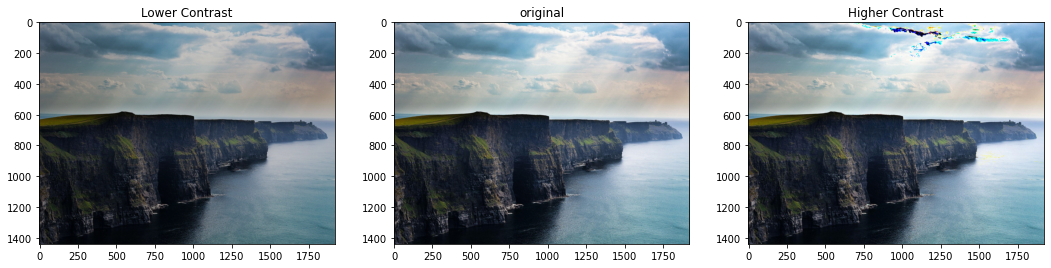

In [4]:
matrix1 = np.ones(img_rgb.shape) * 0.8
matrix2 = np.ones(img_rgb.shape) * 1.05

img_rgb_darker = np.uint8(cv2.multiply(np.float64(img_rgb),matrix1))
img_rgb_brighter = np.uint8(cv2.multiply(np.float64(img_rgb),matrix2))

plt.figure(figsize=[18,5])
plt.subplot(131);plt.imshow(img_rgb_darker);plt.title('Lower Contrast');
plt.subplot(132);plt.imshow(img_rgb);plt.title('original');
plt.subplot(133);plt.imshow(img_rgb_brighter);plt.title('Higher Contrast');

(480, 640)


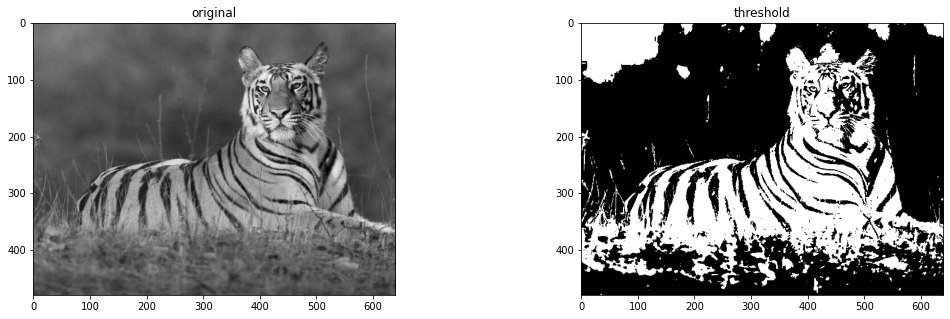

In [5]:
img = cv2.imread('Tiger.jpg', cv2.IMREAD_GRAYSCALE)
retval, img_thresh = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)

plt.figure(figsize = [18,5])
plt.subplot(121);plt.imshow(img, cmap='gray');plt.title('original')
plt.subplot(122);plt.imshow(img_thresh, cmap='gray');plt.title('threshold')
print(img_thresh.shape)

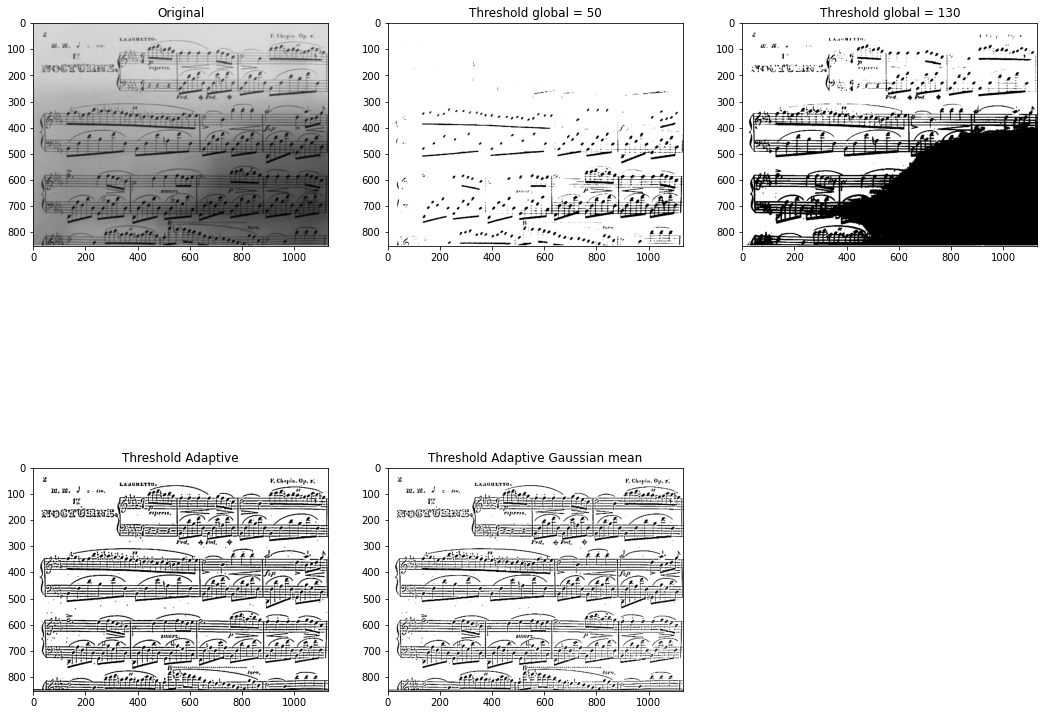

In [6]:
img_read = cv2.imread("Piano.png", cv2.IMREAD_GRAYSCALE)

retval , img_thresh_gb_1 = cv2.threshold(img_read, 50, 255, cv2.THRESH_BINARY)
retval , img_thresh_gb_2 = cv2.threshold(img_read, 130, 255, cv2.THRESH_BINARY)

img_thresh_gb_adp = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,7)
img_thresh_gb_adp_GS = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,7)

plt.figure(figsize=[18,15])
plt.subplot(231);plt.imshow(img_read,cmap='gray');plt.title('Original');
plt.subplot(232);plt.imshow(img_thresh_gb_1,cmap='gray');plt.title('Threshold global = 50');
plt.subplot(233);plt.imshow(img_thresh_gb_2,cmap='gray');plt.title('Threshold global = 130');
plt.subplot(234);plt.imshow(img_thresh_gb_adp,cmap='gray');plt.title('Threshold Adaptive');
plt.subplot(235);plt.imshow(img_thresh_gb_adp_GS,cmap='gray');plt.title('Threshold Adaptive Gaussian mean');

# Bitwise Operation

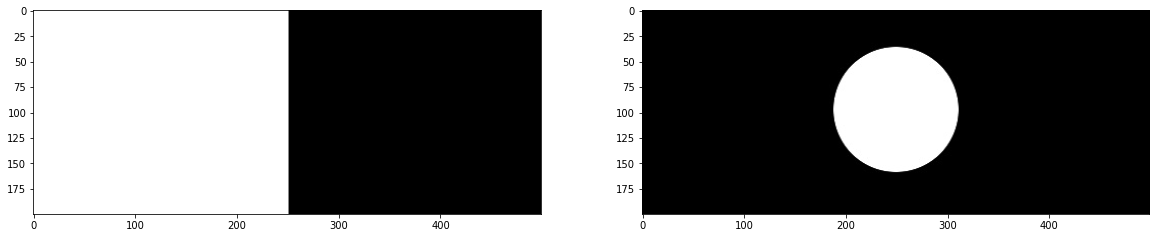

In [7]:
img_rec = cv2.imread("rectangle.jpg", cv2.IMREAD_GRAYSCALE)
img_cir = cv2.imread("circle.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=[20,5])
plt.subplot(121); plt.imshow(img_rec,cmap='gray')
plt.subplot(122); plt.imshow(img_cir,cmap='gray')


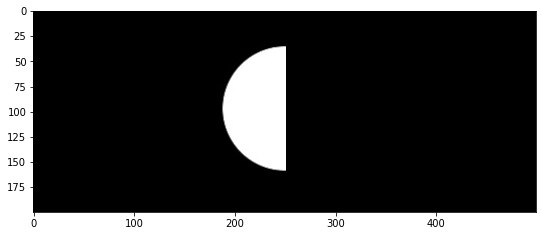

In [8]:
result = cv2.bitwise_and(img_rec, img_cir, mask = None)
plt.imshow(result,cmap='gray')

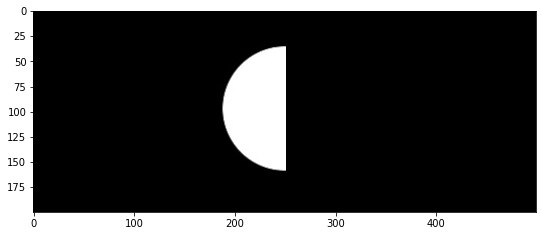

In [9]:
result_ = cv2.bitwise_or(img_rec, img_cir, mask = None)
plt.imshow(result,cmap='gray')

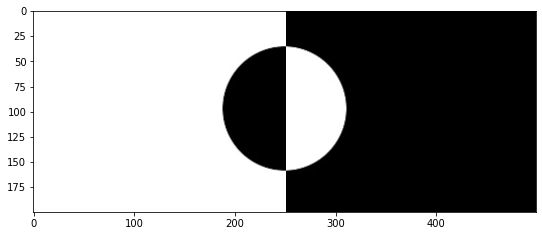

In [10]:
result = cv2.bitwise_xor(img_rec, img_cir, mask = None)
plt.imshow(result,cmap='gray')

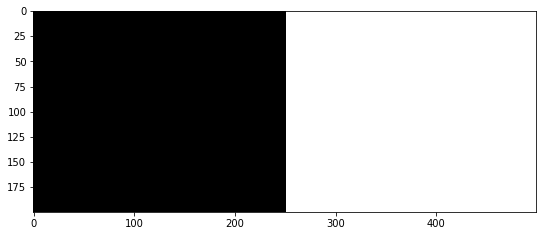

In [11]:
result_rec = cv2.bitwise_not(img_rec, mask = None)
plt.imshow(result_rec,cmap='gray')

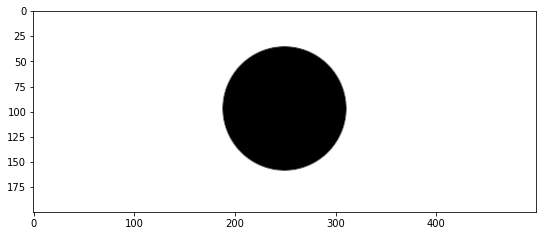

In [12]:
result_NOT = cv2.bitwise_not(img_cir,mask=None)
plt.imshow(result_NOT,cmap='gray')

# APPLICATION: LOGO MANIPULATION

(700, 700, 3)


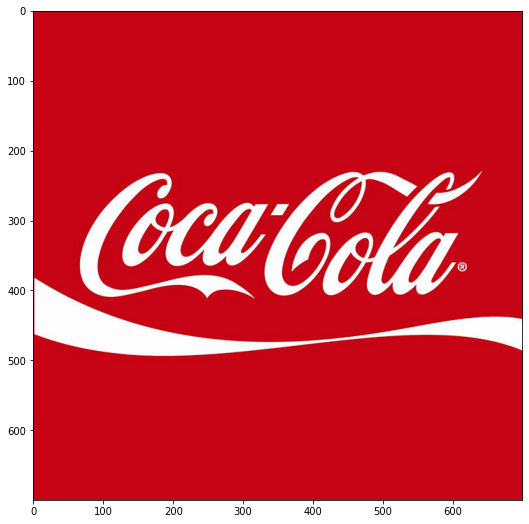

In [13]:
img_bgr = cv2.imread("coca-cola-logo.png")
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
print(img_rgb.shape)
logo_w = img_rgb.shape[0]
logo_h = img_rgb.shape[1]

(700, 700, 3)


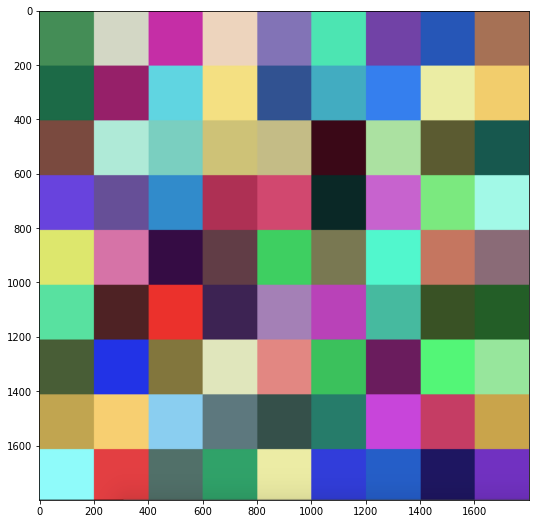

In [16]:
img_bg_bgr = cv2.imread("checkerboard_color.png")
img_bg_rgb = cv2.cvtColor(img_bg_bgr, cv2.COLOR_BGR2RGB)

aspect_ratio = logo_w / img_bg_rgb.shape[1]
dim = (logo_w, int(img_bg_rgb.shape[0] * aspect_ratio))

img_bg_rgb = cv2.resize(img_bg_rgb, dim, interpolation=cv2.INTER_AREA)

plt.imshow(img_bg_bgr)
print(img_bg_rgb.shape)

(700, 700)


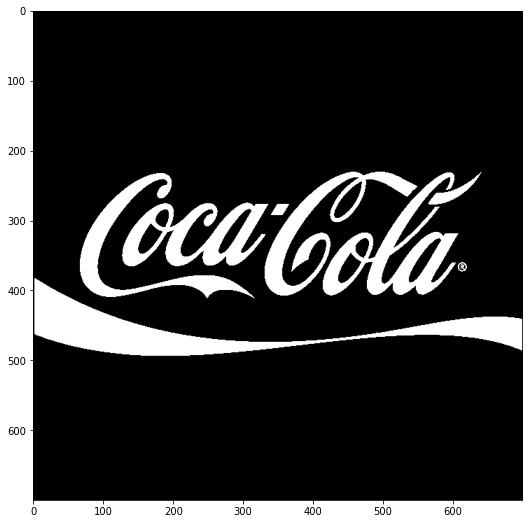

In [19]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

retval, img_mask = cv2.threshold(img_gray, 127,255, cv2.THRESH_BINARY)

plt.imshow(img_mask, cmap="gray")
print(img_mask.shape)

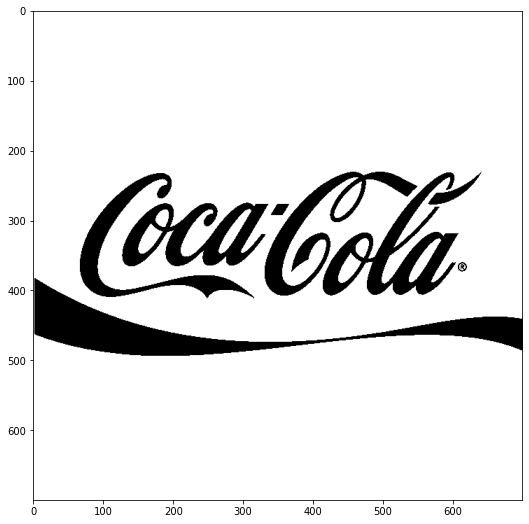

In [20]:
img_mask_inv = np.bitwise_not(img_mask)
plt.imshow(img_mask_inv,cmap="gray")

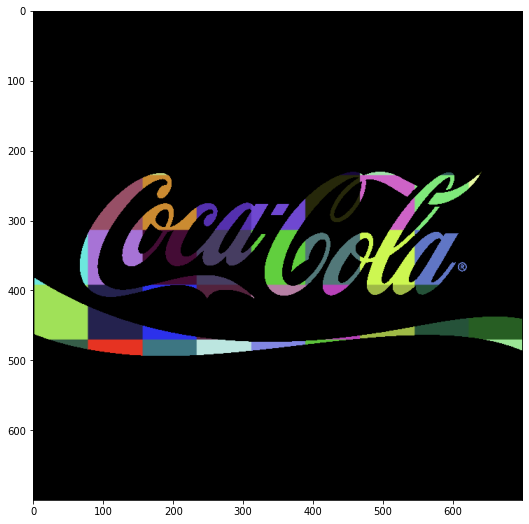

In [21]:
img_background = cv2.bitwise_and(img_bg_rgb, img_bg_rgb, mask = img_mask)
plt.imshow(img_background)

# Isolate foreground from Image

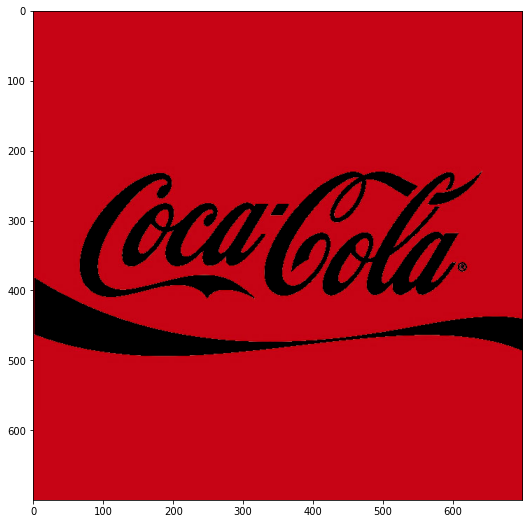

In [22]:
img_foreground = cv2.bitwise_and(img_rgb,img_rgb, mask = img_mask_inv)
plt.imshow(img_foreground)

# Result: Merge Foreground and Background

True

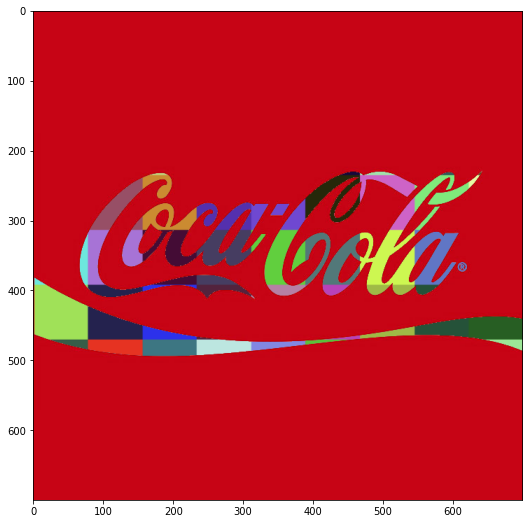

In [23]:
result = cv2.add(img_background, img_foreground)
plt.imshow(result)
cv2.imwrite("Logo_Final.png", result[:,:,::-1])